# Import variants VCF file

In [1]:
import allel
vcf = allel.read_vcf("../data/raw/1349 sample and all 253k unfiltered SNPs.vcf")

In [9]:
mutations = vcf["calldata/GT"]
mutations = mutations.sum(axis=2)
mutations = mutations.T
mutations.shape

In [51]:
vcf["calldata/GT"]

array([[[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]],

       [[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]],

       [[ 1,  1],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]],

       ...,

       [[ 1,  0],
        [ 1,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [-1, -1],
        [ 1,  1]],

       [[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [-1, -1],
        [ 0,  0]],

       [[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [-1, -1],
        [ 0,  0]]], dtype=int8)

# Run PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA()

In [27]:
X_1 = pca.fit_transform(mutations)

In [31]:
pca.components_.shape

(1349, 253708)

In [32]:
pca.singular_values_.shape

(1349,)

# Graph the eigenvalues

In [35]:
import matplotlib.pyplot as plt
import numpy as np

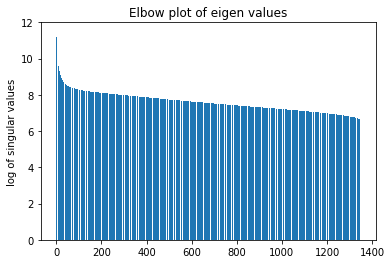

In [48]:
plt.bar(x=range(pca.singular_values_.shape[0]), 
        height=np.log2(pca.singular_values_), )

plt.ylabel('log of singular values')
plt.title('Elbow plot of eigen values')
plt.ylim(0, 12)
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
plt.show()

In [49]:
mutations

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  1,  0, ...,  0, -2,  2],
       [ 0,  0,  0, ...,  0, -2,  0],
       [ 0,  0,  0, ...,  0, -2,  0]])